# Chapter 4. NumPy Basics: Arrays and Vectorized Computation

NumPy, short for Numerical Python, is one of the most important foundational packages for numerical computing in Python. Many computational packages providing scientific functionality use NumPy’s array objects as one of the standard interface lingua francas for data exchange. Much of the knowledge about NumPy that I cover is transferable to pandas as well.

Here are some of the things you’ll find in NumPy:

- ndarray, an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities

- Mathematical functions for fast operations on entire arrays of data without having to write loops

- Tools for reading/writing array data to disk and working with memory-mapped files

- Linear algebra, random number generation, and Fourier transform capabilities

- A C API for connecting NumPy with libraries written in C, C++, or FORTRAN

Because NumPy provides a comprehensive and well-documented C API, it is straightforward to pass data to external libraries written in a low-level language, and for external libraries to return data to Python as NumPy arrays. This feature has made Python a language of choice for wrapping legacy C, C++, or FORTRAN codebases and giving them a dynamic and accessible interface.

While NumPy by itself does not provide modeling or scientific functionality, having an understanding of NumPy arrays and array-oriented computing will help you use tools with array computing semantics, like pandas, much more effectively. Since NumPy is a large topic, I will cover many advanced NumPy features like broadcasting in more depth later (see Appendix A). Many of these advanced features are not needed to follow the rest of this book, but they may help you as you go deeper into scientific computing in Python.

For most data analysis applications, the main areas of functionality I’ll focus on are:

- Fast array-based operations for data munging and cleaning, subsetting and filtering, transformation, and any other kind of computation

- Common array algorithms like sorting, unique, and set operations

- Efficient descriptive statistics and aggregating/summarizing data

- Data alignment and relational data manipulations for merging and joining heterogeneous datasets

- Expressing conditional logic as array expressions instead of loops with if-elif-else branches

- Group-wise data manipulations (aggregation, transformation, and function application)

While NumPy provides a computational foundation for general numerical data processing, many readers will want to use pandas as the basis for most kinds of statistics or analytics, especially on tabular data. Also, pandas provides some more domain-specific functionality like time series manipulation, which is not present in NumPy.

One of the reasons NumPy is so important for numerical computations in Python is because it is designed for efficiency on large arrays of data. There are a number of reasons for this:

- NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects. NumPy’s library of algorithms written in the C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences.

- NumPy operations perform complex computations on entire arrays without the need for Python for loops, which can be slow for large sequences. NumPy is faster than regular Python code because its C-based algorithms avoid overhead present with regular interpreted Python code.

To give you an idea of the performance difference, consider a NumPy array of one million integers, and the equivalent Python list:

In [69]:
import numpy as np

my_arr = np.arange(1_000_000)

my_list = list(range(1_000_000))

Now let’s multiply each sequence by 2:

In [72]:
%timeit my_arr2 = my_arr * 2

506 μs ± 38.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [74]:
%timeit my_list2 = [x * 2 for x in my_list]

16.1 ms ± 228 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

## 4.1 The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements.

To give you a flavor of how NumPy enables batch computations with similar syntax to scalar values on built-in Python objects, I first import NumPy and create a small array:

In [80]:
import numpy as np
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

I then write mathematical operations with data:

In [83]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [85]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In the first example, all of the elements have been multiplied by 10. In the second, the corresponding values in each “cell” in the array have been added to each other.

An ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be the same type. Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array:

In [89]:
data.shape

(2, 3)

In [91]:
data.dtype

dtype('float64')

This chapter will introduce you to the basics of using NumPy arrays, and it should be sufficient for following along with the rest of the book. While it’s not necessary to have a deep understanding of NumPy for many data analytical applications, becoming proficient in array-oriented programming and thinking is a key step along the way to becoming a scientific Python guru.

## Creating ndarrays

The easiest way to create an array is to use the array function. This accepts any sequence-like object (including other arrays) and produces a new NumPy array containing the passed data. For example, a list is a good candidate for conversion:

In [96]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array:

In [99]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions, with shape inferred from the data. We can confirm this by inspecting the ndim and shape attributes:

In [102]:
arr2.ndim

2

In [104]:
arr2.shape

(2, 4)

Unless explicitly specified (discussed in “Data Types for ndarrays”), numpy.array tries to infer a good data type for the array that it creates. The data type is stored in a special dtype metadata object; for example, in the previous two examples we have:

In [107]:
arr1.dtype

dtype('float64')

In [109]:
arr2.dtype

dtype('int64')

In addition to numpy.array, there are a number of other functions for creating new arrays. As examples, numpy.zeros and numpy.ones create arrays of 0s or 1s, respectively, with a given length or shape. numpy.empty creates an array without initializing its values to any particular value. To create a higher dimensional array with these methods, pass a tuple for the shape:

In [112]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [114]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [116]:
np.empty((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

It’s not safe to assume that numpy.empty will return an array of all zeros. This function returns uninitialized memory and thus may contain nonzero “garbage” values. You should use this function only if you intend to populate the new array with data.

numpy.arange is an array-valued version of the built-in Python range function:

In [120]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

See Table 4-1 for a short list of standard array creation functions. Since NumPy is focused on numerical computing, the data type, if not specified, will in many cases be float64 (floating point).

### Table 4-1. Some important NumPy array creation functions

|Function|Description|
|---|---|
|array|	Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a data type or explicitly specifying a data type; copies the input data by default|
|asarray|	Convert input to ndarray, but do not copy if the input is already an ndarray|
|arange|	Like the built-in range but returns an ndarray instead of a list|
|ones, ones_like|	Produce an array of all 1s with the given shape and data type; ones_like takes another array and produces a ones array of the same shape and data type|
|zeros, zeros_like|	Like ones and ones_like but producing arrays of 0s instead|
|empty, empty_like|	Create new arrays by allocating new memory, but do not populate with any values like ones and zeros|
|full, full_like|	Produce an array of the given shape and data type with all values set to the indicated “fill value”; full_like takes another array and produces a filled array of the same shape and data type|
|eye, identity|	Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere)|

## Data Types for ndarrays


The data type or dtype is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data:

In [126]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [128]:
arr1.dtype

dtype('float64')

In [130]:
arr2.dtype

dtype('int32')

Data types are a source of NumPy’s flexibility for interacting with data coming from other systems. In most cases they provide a mapping directly onto an underlying disk or memory representation, which makes it possible to read and write binary streams of data to disk and to connect to code written in a low-level language like C or FORTRAN. The numerical data types are named the same way: a type name, like float or int, followed by a number indicating the number of bits per element. A standard double-precision floating-point value (what’s used under the hood in Python’s float object) takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as float64. See Table 4-2 for a full listing of NumPy’s supported data types.

## Table 4-2. NumPy data types

|Type|Type code|Description|
|---|---|---|
|int8, uint8|	i1, u1|	Signed and unsigned 8-bit (1 byte) integer types|
|int16, uint16|	i2, u2|	Signed and unsigned 16-bit integer types|
|int32, uint32|	i4, u4|	Signed and unsigned 32-bit integer types|
|int64, uint64|	i8, u8|	Signed and unsigned 64-bit integer types|
|float16|	f2|	Half-precision floating point|
|float32|	f4 or f|	Standard single-precision floating point; compatible with C float|
|float64|	f8 or d|	Standard double-precision floating point; compatible with C double and Python float object|
|float128|	f16 or g|	Extended-precision floating point|
|complex64, complex128, complex256|	c8, c16, c32|	Complex numbers represented by two 32, 64, or 128 floats, respectively|
|bool	|?|	Boolean type storing True and False values|
|object	|O|	Python object type; a value can be any Python object|
|string_|	S|	Fixed-length ASCII string type (1 byte per character); for example, to create a string data type with length 10, use 'S10'|
|unicode_|	U|	Fixed-length Unicode type (number of bytes platform specific); same specification semantics as string_ (e.g., 'U10')|

There are both signed and unsigned integer types, and many readers will not be familiar with this terminology. A signed integer can represent both positive and negative integers, while an unsigned integer can only represent nonzero integers. For example, int8 (signed 8-bit integer) can represent integers from -128 to 127 (inclusive), while uint8 (unsigned 8-bit integer) can represent 0 through 255.

You can explicitly convert or cast an array from one data type to another using ndarray’s astype method:

In [136]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [138]:
float_arr = arr.astype(np.float64)
float_arr

array([1., 2., 3., 4., 5.])

In [140]:
float_arr.dtype

dtype('float64')

In this example, integers were cast to floating point. If I cast some floating-point numbers to be of integer data type, the decimal part will be truncated:

In [143]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [145]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of strings representing numbers, you can use astype to convert them to numeric form:

In [148]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

If casting were to fail for some reason (like a string that cannot be converted to float64), a ValueError will be raised. Before, I was a bit lazy and wrote float instead of np.float64; NumPy aliases the Python types to its own equivalent data types.

You can also use another array’s dtype attribute:

In [152]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

There are shorthand type code strings you can also use to refer to a dtype:

In [155]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

#### Note
Calling astype always creates a new array (a copy of the data), even if the new data type is the same as the old data type.

# Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data without writing any for loops. NumPy users call this vectorization. Any arithmetic operations between equal-size arrays apply the operation element-wise:

In [160]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [162]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [164]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [167]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [169]:
arr ** 2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

Comparisons between arrays of the same size yield Boolean arrays:

In [172]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [174]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

Evaluating operations between differently sized arrays is called broadcasting and will be discussed in more detail in Appendix A. Having a deep understanding of broadcasting is not necessary for most of this book.

## Basic Indexing and Slicing

NumPy array indexing is a deep topic, as there are many ways you may want to select a subset of your data or individual elements. One-dimensional arrays are simple; on the surface they act similarly to Python lists:

In [179]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [181]:
arr[5]

5

In [183]:
arr[5:8]

array([5, 6, 7])

In [185]:
arr[5:8] = 12

In [187]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

As you can see, if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is propagated (or broadcast henceforth) to the entire selection.

### Note
An important first distinction from Python’s built-in lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array.

To give an example of this, I first create a slice of arr:

In [192]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

Now, when I change values in arr_slice, the mutations are reflected in the original array arr:

In [195]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The “bare” slice [:] will assign to all values in an array:

In [198]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you are new to NumPy, you might be surprised by this, especially if you have used other array programming languages that copy data more eagerly. As NumPy has been designed to be able to work with very large arrays, you could imagine performance and memory problems if NumPy insisted on always copying data.

### Caution
If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, arr[5:8].copy(). As you will see, pandas works this way, too.

With higher dimensional arrays, you have many more options. In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:

In [203]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively. But that is a bit too much work, so you can pass a comma-separated list of indices to select individual elements. So these are equivalent:

In [206]:
arr2d[0][2]

3

In [208]:
arr2d[0, 2]

3

See Figure 4-1 for an illustration of indexing on a two-dimensional array. I find it helpful to think of axis 0 as the “rows” of the array and axis 1 as the “columns.”

![](pda3_0401.png)

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions. So in the 2 × 2 × 3 array arr3d:

In [213]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0] is a 2 × 3 array:

In [216]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to arr3d[0]:

In [219]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [221]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, arr3d[1, 0] gives you all of the values whose indices start with (1, 0), forming a one-dimensional array:

In [224]:
arr3d[1, 0]

array([7, 8, 9])

This expression is the same as though we had indexed in two steps:

In [229]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [231]:
x[0]

array([7, 8, 9])

Note that in all of these cases where subsections of the array have been selected, the returned arrays are views.

### Caution
This multidimensional indexing syntax for NumPy arrays will not work with regular Python objects, such as lists of lists.

## Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced with the familiar syntax:

In [237]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [239]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

Consider the two-dimensional array from before, arr2d. Slicing this array is a bit different:

In [242]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [244]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

As you can see, it has sliced along axis 0, the first axis. A slice, therefore, selects a range of elements along an axis. It can be helpful to read the expression arr2d[:2] as “select the first two rows of arr2d.”

You can pass multiple slices just like you can pass multiple indexes:

In [248]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number of dimensions. By mixing integer indexes and slices, you get lower dimensional slices.

For example, I can select the second row but only the first two columns, like so:

In [252]:
lower_dim_slice = arr2d[1, :2]

Here, while arr2d is two-dimensional, lower_dim_slice is one-dimensional, and its shape is a tuple with one axis size:

In [255]:
lower_dim_slice.shape

(2,)

Similarly, I can select the third column but only the first two rows, like so:

In [258]:
arr2d[:2, 2]

array([3, 6])

See Figure 4-2 for an illustration. Note that a colon by itself means to take the entire axis, so you can slice only higher dimensional axes by doing:

In [261]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Of course, assigning to a slice expression assigns to the whole selection:

In [264]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

![](pda3_0402.png)

## Boolean Indexing

Let’s consider an example where we have some data in an array and an array of names with duplicates:

In [269]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                 [-12, -4], [3, 4]])

In [271]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [273]:
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

Suppose each name corresponds to a row in the data array and we wanted to select all the rows with the corresponding name "Bob". Like arithmetic operations, comparisons (such as ==) with arrays are also vectorized. Thus, comparing names with the string "Bob" yields a Boolean array:

In [276]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

This Boolean array can be passed when indexing the array:

In [279]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

The Boolean array must be of the same length as the array axis it’s indexing. You can even mix and match Boolean arrays with slices or integers (or sequences of integers; more on this later).

In these examples, I select from the rows where names == "Bob" and index the columns, too:

In [283]:
data[names == "Bob", 1:]

array([[7],
       [0]])

In [285]:
data[names == "Bob", 1]

array([7, 0])

To select everything but "Bob" you can either use != or negate the condition using ~:

In [288]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [290]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [292]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

The ~ operator can be useful when you want to invert a Boolean array referenced by a variable:

In [295]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

To select two of the three names to combine multiple Boolean conditions, use Boolean arithmetic operators like & (and) and | (or):

In [298]:
mask = (names == "Bob") | (names == "Will")

In [300]:
mask

array([ True, False,  True,  True,  True, False, False])

In [302]:
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

Selecting data from an array by Boolean indexing and assigning the result to a new variable always creates a copy of the data, even if the returned array is unchanged.

### Caution
The Python keywords and and or do not work with Boolean arrays. Use & (and) and | (or) instead.

Setting values with Boolean arrays works by substituting the value or values on the righthand side into the locations where the Boolean array’s values are True. To set all of the negative values in data to 0, we need only do:

In [307]:
data[data < 0] = 0

In [309]:
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

You can also set whole rows or columns using a one-dimensional Boolean array:

In [312]:
data[names != "Joe"] = 7

In [314]:
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

As we will see later, these types of operations on two-dimensional data are convenient to do with pandas.

## Fancy Indexing

Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays. Suppose we had an 8 × 4 array:

In [319]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i

In [321]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order:

In [324]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Hopefully this code did what you expected! Using negative indices selects rows from the end:

In [327]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices:

In [330]:
arr = np.arange(32).reshape((8, 4))

In [332]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [334]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

To learn more about the reshape method, have a look at Appendix A.

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected. The result of fancy indexing with as many integer arrays as there are axes is always one-dimensional.

The behavior of fancy indexing in this case is a bit different from what some users might have expected (myself included), which is the rectangular region formed by selecting a subset of the matrix’s rows and columns. Here is one way to get that:

In [339]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array when assigning the result to a new variable. If you assign values with fancy indexing, the indexed values will be modified:

In [342]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [344]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0

In [346]:
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

## Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the transpose method and the special T attribute:

In [350]:
arr = np.arange(15).reshape((3, 5))

In [352]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [354]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you may do this very often—for example, when computing the inner matrix product using numpy.dot:

In [357]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])

In [359]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [361]:
np.dot(arr.T, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

The @ infix operator is another way to do matrix multiplication:

In [364]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

Simple transposing with .T is a special case of swapping axes. ndarray has the method swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearrange the data:

In [367]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [369]:
arr.swapaxes(0, 1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

swapaxes similarly returns a view on the data without making a copy.

# 4.2 Pseudorandom Number Generation

The numpy.random module supplements the built-in Python random module with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions. For example, you can get a 4 × 4 array of samples from the standard normal distribution using numpy.random.standard_normal:

In [374]:
samples = np.random.standard_normal(size=(4, 4))

In [376]:
samples

array([[-0.45210195,  1.33450663, -1.52723594, -0.72566964],
       [-0.94585048, -0.47489154,  0.32353223, -0.10711505],
       [ 0.12510761, -0.29897766, -1.10279432, -1.24451656],
       [ 0.12259772, -1.58658624,  0.55460572,  0.41367799]])

Python’s built-in random module, by contrast, samples only one value at a time. As you can see from this benchmark, numpy.random is well over an order of magnitude faster for generating very large samples:

In [379]:
from random import normalvariate
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

221 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.6 ms ± 58.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


These random numbers are not truly random (rather, pseudorandom) but instead are generated by a configurable random number generator that determines deterministically what values are created. Functions like numpy.random.standard_normal use the numpy.random module’s default random number generator, but your code can be configured to use an explicit generator:

In [382]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))

The seed argument is what determines the initial state of the generator, and the state changes each time the rng object is used to generate data. The generator object rng is also isolated from other code which might use the numpy.random module:

In [385]:
type(rng)

numpy.random._generator.Generator

See Table 4-3 for a partial list of methods available on random generator objects like rng. I will use the rng object I created above to generate random data throughout the rest of the chapter.

### Table 4-3. NumPy random number generator methods

|Method|Description|
|---|---|
|permutation|Return a random permutation of a sequence, or return a permuted range|
|shuffle|Randomly permute a sequence in place|
|uniform|Draw samples from a uniform distribution|
|integers|Draw random integers from a given low-to-high range|
|standard_normal|Draw samples from a normal distribution with mean 0 and standard deviation 1|
|binomial|Draw samples from a binomial distribution|
|normal|Draw samples from a normal (Gaussian) distribution|
|beta|Draw samples from a beta distribution|
|chisquare|Draw samples from a chi-square distribution|
|gamma|Draw samples from a gamma distribution|
|uniform|Draw samples from a uniform [0, 1) distribution|

# 4.3 Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

Many ufuncs are simple element-wise transformations, like numpy.sqrt or numpy.exp:

In [392]:
arr = np.arange(10)

In [394]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [396]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [398]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs. Others, such as numpy.add or numpy.maximum, take two arrays (thus, binary ufuncs) and return a single array as the result:

In [401]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)

In [403]:
x

array([-1.3677927 ,  0.6488928 ,  0.36105811, -1.95286306,  2.34740965,
        0.96849691, -0.75938718,  0.90219827])

In [405]:
y

array([-0.46695317, -0.06068952,  0.78884434, -1.25666813,  0.57585751,
        1.39897899,  1.32229806, -0.29969852])

In [407]:
np.maximum(x, y)

array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

In this example, numpy.maximum computed the element-wise maximum of the elements in x and y.

While not common, a ufunc can return multiple arrays. numpy.modf is one example: a vectorized version of the built-in Python math.modf, it returns the fractional and integral parts of a floating-point array:

In [411]:
arr = rng.standard_normal(7) * 5

In [413]:
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [415]:
remainder, whole_part = np.modf(arr)

In [417]:
remainder

array([ 0.51459671, -0.10791367, -0.7909463 ,  0.24741966, -0.71800536,
       -0.40843795,  0.62369966])

In [419]:
whole_part

array([ 4., -8., -0.,  2., -6., -0.,  8.])

Ufuncs accept an optional out argument that allows them to assign their results into an existing array rather than create a new one:

In [422]:
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [424]:
out = np.zeros_like(arr)

In [426]:
np.add(arr, 1)

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

In [428]:
np.add(arr, 1, out=out)

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

In [430]:
out

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

See Tables 4-4 and 4-5 for a listing of some of NumPy’s ufuncs. New ufuncs continue to be added to NumPy, so consulting the online NumPy documentation is the best way to get a comprehensive listing and stay up to date.

### Table 4-4. Some unary universal functions

|Function|Description|
|---|---|
|abs, fabs|	Compute the absolute value element-wise for integer, floating-point, or complex values|
|sqrt|	Compute the square root of each element (equivalent to arr ** 0.5)|
|square|	Compute the square of each element (equivalent to arr ** 2)|
|exp|	Compute the exponent ex of each element|
|log, log10, log2, log1p|	Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively|
|sign|	Compute the sign of each element: 1 (positive), 0 (zero), or –1 (negative)|
|ceil|	Compute the ceiling of each element (i.e., the smallest integer greater than or equal to that number)|
|floor|	Compute the floor of each element (i.e., the largest integer less than or equal to each element)|
|rint|	Round elements to the nearest integer, preserving the dtype|
|modf|	Return fractional and integral parts of array as separate arrays|
|isnan|	Return Boolean array indicating whether each value is NaN (Not a Number)|
|isfinite, isinf|	Return Boolean array indicating whether each element is finite (non-inf, non-NaN) or infinite, respectively|
|cos, cosh, sin, sinh, tan, tanh|	Regular and hyperbolic trigonometric functions|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh|	Inverse trigonometric functions|
|logical_not|	Compute truth value of not x element-wise (equivalent to ~arr)|

### Table 4-5. Some binary universal functions

|Function|Description|
|---|---|
|add|	Add corresponding elements in arrays|
|subtract|	Subtract elements in second array from first array|
|multiply|	Multiply array elements|
|divide, floor_divide|	Divide or floor divide (truncating the remainder)|
|power|	Raise elements in first array to powers indicated in second array|
|maximum, fmax|	Element-wise maximum; fmax ignores NaN|
|minimum, fmin|	Element-wise minimum; fmin ignores NaN|
|mod|	Element-wise modulus (remainder of division)|
|copysign|	Copy sign of values in second argument to values in first argument|
|greater, greater_equal, less, less_equal, equal, not_equal|	Perform element-wise comparison, yielding Boolean array (equivalent to infix operators >, >=, <, <=, ==, !=)|
|logical_and|	Compute element-wise truth value of AND (&) logical operation|
|logical_or|	Compute element-wise truth value of OR (|) logical operation|
|logical_xor|	Compute element-wise truth value of XOR (^) logical operation|

# 4.4 Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is referred to by some people as vectorization. In general, vectorized array operations will usually be significantly faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations. Later, in Appendix A, I explain broadcasting, a powerful method for vectorizing computations.

As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2) across a regular grid of values. The numpy.meshgrid function takes two one-dimensional arrays and produces two two-dimensional matrices corresponding to all pairs of (x, y) in the two arrays:

In [438]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would write with two points:

In [441]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

As a preview of Chapter 9, I use matplotlib to create visualizations of this two-dimensional array:

In Figure 4-3, I used the matplotlib function imshow to create an image plot from a two-dimensional array of function values.

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/r3/gmt08cnn7lzdwnng743vjxmw0000gp/T/ipykernel_8535/2740159350.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


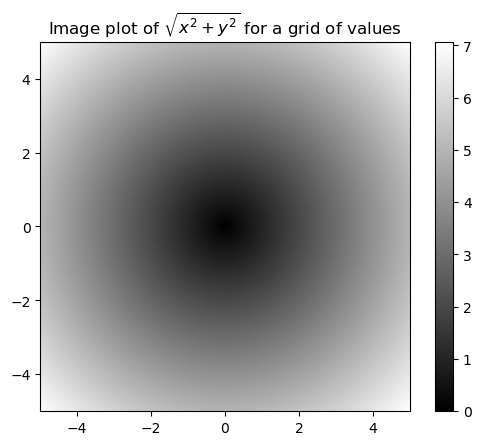

In [449]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.draw()

If you’re working in IPython, you can close all open plot windows by executing plt.close("all"):

In [452]:
plt.close("all")

### Note
The term vectorization is used to describe some other computer science concepts, but in this book I use it to describe operations on whole arrays of data at once rather than going value by value using a Python for loop.

## Expressing Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression x if condition else y. Suppose we had a Boolean array and two arrays of values:

In [457]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr. A list comprehension doing this might look like:

In [460]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With numpy.where you can do this with a single function call:

In [463]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to numpy.where don’t need to be arrays; one or both of them can be scalars. A typical use of where in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is possible to do with numpy.where:

In [466]:
arr = rng.standard_normal((4, 4))
arr

array([[ 2.61815943,  0.77736134,  0.8286332 , -0.95898831],
       [-1.20938829, -1.41229201,  0.54154683,  0.7519394 ],
       [-0.65876032, -1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.26998312, -0.09296246, -0.06615089]])

In [468]:
arr > 0

array([[ True,  True,  True, False],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False,  True, False, False]])

In [470]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2]])

You can combine scalars and arrays when using numpy.where. For example, I can replace all positive values in arr with the constant 2, like so:

In [473]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.        ,  2.        ,  2.        , -0.95898831],
       [-1.20938829, -1.41229201,  2.        ,  2.        ],
       [-0.65876032, -1.22867499,  2.        ,  2.        ],
       [-0.13081169,  2.        , -0.09296246, -0.06615089]])

## Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class. You can use aggregations (sometimes called reductions) like sum, mean, and std (standard deviation) either by calling the array instance method or using the top-level NumPy function. When you use the NumPy function, like numpy.sum, you have to pass the array you want to aggregate as the first argument.

Here I generate some normally distributed random data and compute some aggregate statistics:

In [478]:
arr = rng.standard_normal((5, 4))
arr

array([[-1.10821447,  0.13595685,  1.34707776,  0.06114402],
       [ 0.0709146 ,  0.43365454,  0.27748366,  0.53025239],
       [ 0.53672097,  0.61835001, -0.79501746,  0.30003095],
       [-1.60270159,  0.26679883, -1.26162378, -0.07127081],
       [ 0.47404973, -0.41485376,  0.0977165 , -1.64041784]])

In [480]:
arr.mean()

-0.08719744457434529

In [482]:
np.mean(arr)

-0.08719744457434529

In [484]:
arr.sum()

-1.743948891486906

Functions like mean and sum take an optional axis argument that computes the statistic over the given axis, resulting in an array with one less dimension:

In [487]:
arr.mean(axis=1)

array([ 0.10899104,  0.3280763 ,  0.16502112, -0.66719934, -0.37087634])

In [489]:
arr.sum(axis=0)

array([-1.62923076,  1.03990647, -0.33436331, -0.82026129])

Here, arr.mean(axis=1) means “compute mean across the columns,” where arr.sum(axis=0) means “compute sum down the rows.”

Other methods like cumsum and cumprod do not aggregate, instead producing an array of the intermediate results:

In [493]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like cumsum return an array of the same size but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [496]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

The expression arr.cumsum(axis=0) computes the cumulative sum along the rows, while arr.cumsum(axis=1) computes the sums along the columns:

In [499]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [501]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

See Table 4-6 for a full listing. We’ll see many examples of these methods in action in later chapters.

### Table 4-6. Basic array statistical methods

|Method|Description|
|---|---|
|sum|	Sum of all the elements in the array or along an axis; zero-length arrays have sum 0|
|mean|	Arithmetic mean; invalid (returns NaN) on zero-length arrays|
|std, var|	Standard deviation and variance, respectively|
|min, max|	Minimum and maximum|
|argmin, argmax|	Indices of minimum and maximum elements, respectively|
|cumsum|	Cumulative sum of elements starting from 0|
|cumprod|	Cumulative product of elements starting from 1|

## Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, sum is often used as a means of counting True values in a Boolean array:

In [509]:
arr = rng.standard_normal(100)

In [511]:
(arr > 0).sum() # Number of positive values

55

In [513]:
(arr <= 0).sum() # Number of non-positive values

45

The parentheses here in the expression (arr > 0).sum() are necessary to be able to call sum() on the temporary result of arr > 0.

Two additional methods, any and all, are useful especially for Boolean arrays. any tests whether one or more values in an array is True, while all checks if every value is True:

In [517]:
bools = np.array([False, False, True, False])

In [519]:
bools.any()

True

In [521]:
bools.all()

False

These methods also work with non-Boolean arrays, where nonzero elements are treated as True.

## Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in place with the sort method:

In [526]:
arr = rng.standard_normal(6)
arr

array([-0.03425814, -0.3551683 , -0.37842837,  0.19064869,  0.48439629,
        1.23026775])

In [532]:
arr.sort()
arr

array([-0.37842837, -0.3551683 , -0.03425814,  0.19064869,  0.48439629,
        1.23026775])

You can sort each one-dimensional section of values in a multidimensional array in place along an axis by passing the axis number to sort. In this example data:

In [535]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.83297062, -0.56494175,  1.41469601],
       [ 1.24828122, -1.5589481 ,  0.66523259],
       [ 0.82559517,  0.96631883,  0.5471753 ],
       [-1.29718326, -0.26763433, -2.07020656],
       [-0.15789255,  2.02894262,  0.68157089]])

arr.sort(axis=0) sorts the values within each column, while 

arr.sort(axis=1) sorts across each row:

In [538]:
arr.sort(axis=0)
arr

array([[-1.29718326, -1.5589481 , -2.07020656],
       [-0.15789255, -0.56494175,  0.5471753 ],
       [ 0.82559517, -0.26763433,  0.66523259],
       [ 0.83297062,  0.96631883,  0.68157089],
       [ 1.24828122,  2.02894262,  1.41469601]])

In [540]:
arr.sort(axis=1)
arr

array([[-2.07020656, -1.5589481 , -1.29718326],
       [-0.56494175, -0.15789255,  0.5471753 ],
       [-0.26763433,  0.66523259,  0.82559517],
       [ 0.68157089,  0.83297062,  0.96631883],
       [ 1.24828122,  1.41469601,  2.02894262]])

The top-level method numpy.sort returns a sorted copy of an array (like the Python built-in function sorted) instead of modifying the array in place. For example:

In [543]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

For more details on using NumPy’s sorting methods, and more advanced techniques like indirect sorts, see Appendix A. Several other kinds of data manipulations related to sorting (e.g., sorting a table of data by one or more columns) can also be found in pandas.

## Unique and Other Set Logic


NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is numpy.unique, which returns the sorted unique values in an array:

In [548]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [550]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

Contrast numpy.unique with the pure Python alternative:

In [553]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In many cases, the NumPy version is faster and returns a NumPy array rather than a Python list.

Another function, numpy.in1d, tests membership of the values in one array in another, returning a Boolean array:

In [557]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

See Table 4-7 for a listing of array set operations in NumPy.

Table 4-7. Array set operations

|Method|	Description|
|---|---|
|unique(x)|	Compute the sorted, unique elements in x|
|intersect1d(x, y)|	Compute the sorted, common elements in x and y|
|union1d(x, y)|	Compute the sorted union of elements|
|in1d(x, y)|	Compute a Boolean array indicating whether each element of x is contained in y|
|setdiff1d(x, y)|	Set difference, elements in x that are not in y|
|setxor1d(x, y)|	Set symmetric differences; elements that are in either of the arrays, but not both|


# 4.5 File Input and Output with Arrays


NumPy is able to save and load data to and from disk in some text or binary formats. In this section I discuss only NumPy’s built-in binary format, since most users will prefer pandas and other tools for loading text or tabular data (see Chapter 6 for much more).

numpy.save and numpy.load are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension .npy:

In [564]:
arr = np.arange(10)
np.save("some_array", arr)

If the file path does not already end in .npy, the extension will be appended. The array on disk can then be loaded with numpy.load:

In [567]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can save multiple arrays in an uncompressed archive using numpy.savez and passing the arrays as keyword arguments:

In [570]:
np.savez("array_archive.npz", a=arr, b=arr)

When loading an .npz file, you get back a dictionary-like object that loads the individual arrays lazily:

In [573]:
arch = np.load("array_archive.npz")
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you may wish to use numpy.savez_compressed instead:

In [576]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

# 4.6 Linear Algebra

Linear algebra operations, like matrix multiplication, decompositions, determinants, and other square matrix math, are an important part of many array libraries. Multiplying two two-dimensional arrays with * is an element-wise product, while matrix multiplications require using a function. Thus, there is a function dot, both an array method and a function in the numpy namespace, for matrix multiplication:

In [580]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

In [584]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [586]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [588]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [590]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y) is equivalent to np.dot(x, y):

In [593]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array:

In [596]:
x @ np.ones(3)

array([ 6., 15.])

numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant:

In [609]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))

In [611]:
mat = X.T @ X

In [613]:
inv(mat)

array([[ 0.58307244, -0.63800171,  0.44476905,  0.26715781,  0.54448412],
       [-0.63800171,  2.22151216, -0.76988008, -1.63529272, -2.31842555],
       [ 0.44476905, -0.76988008,  1.47266988, -0.17959644,  0.55409136],
       [ 0.26715781, -1.63529272, -0.17959644,  2.05471392,  2.03610368],
       [ 0.54448412, -2.31842555,  0.55409136,  2.03610368,  2.73912555]])

In [615]:
mat @ inv(mat)

array([[ 1.00000000e+00,  1.04966628e-16, -2.79262738e-17,
        -3.96621661e-17,  1.30855089e-17],
       [ 1.03893958e-16,  1.00000000e+00, -2.19133592e-16,
        -2.45743676e-15, -1.98850712e-15],
       [ 3.12281788e-16,  2.09716303e-16,  1.00000000e+00,
        -9.86048747e-16, -7.32854405e-16],
       [ 2.82914093e-16,  7.15905969e-18,  3.49440813e-16,
         1.00000000e+00,  6.43760645e-16],
       [-1.09017136e-16,  7.38018531e-16, -1.65734296e-16,
        -1.96770662e-15,  1.00000000e+00]])

The expression X.T.dot(X) computes the dot product of X with its transpose X.T.

See Table 4-8 for a list of some of the most commonly used linear algebra functions.

Table 4-8. Commonly used numpy.linalg functions

|Function|	Description|
|---|---|
|diag|	Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal|
|dot|	Matrix multiplication|
|trace|	Compute the sum of the diagonal elements|
|det|	Compute the matrix determinant|
|eig|	Compute the eigenvalues and eigenvectors of a square matrix|
|inv|	Compute the inverse of a square matrix|
|pinv|	Compute the Moore-Penrose pseudoinverse of a matrix|
|qr|	Compute the QR decomposition|
|svd|	Compute the singular value decomposition (SVD)|
|solve|	Solve the linear system Ax = b for x, where A is a square matrix|
|lstsq|	Compute the least-squares solution to Ax = b|

# 4.7 Example: Random Walks

The simulation of random walks provides an illustrative application of utilizing array operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

Here is a pure Python way to implement a single random walk with 1,000 steps using the built-in random module:

In [623]:
#! blockstart
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
#! blockend

See Figure 4-4 for an example plot of the first 100 values on one of these random walks:

In [626]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

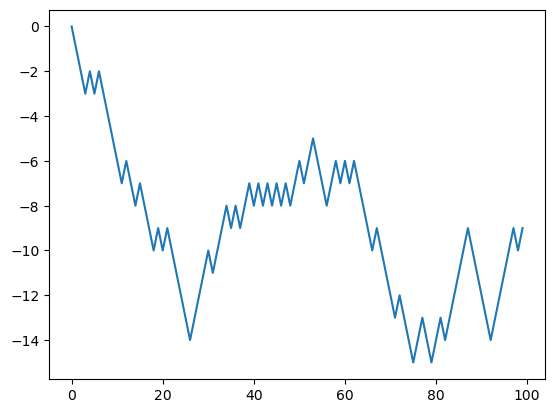

In [628]:
plt.plot(walk[:100])

You might make the observation that walk is the cumulative sum of the random steps and could be evaluated as an array expression. Thus, I use the numpy.random module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

In [631]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

From this we can begin to extract statistics like the minimum and maximum value along the walk’s trajectory:

In [636]:
walk.min()

-8

In [638]:
walk.max()

50

A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. np.abs(walk) >= 10 gives us a Boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using argmax, which returns the first index of the maximum value in the Boolean array (True is the maximum value):

In [641]:
(np.abs(walk) >= 10).argmax()

155

Note that using argmax here is not always efficient because it always makes a full scan of the array. In this special case, once a True is observed we know it to be the maximum value.

## Simulating Many Random Walks at Once

If your goal was to simulate many random walks, say five thousand of them, you can generate all of the random walks with minor modifications to the preceding code. If passed a 2-tuple, the numpy.random functions will generate a two-dimensional array of draws, and we can compute the cumulative sum for each row to compute all five thousand random walks in one shot:

In [646]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

Now, we can compute the maximum and minimum values obtained over all of the walks:

In [649]:
walks.max()

114

In [651]:
walks.min()

-120

Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is slightly tricky because not all 5,000 of them reach 30. We can check this using the any method:

In [660]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

In [662]:
hits30

array([False,  True,  True, ...,  True, False,  True])

In [664]:
hits30.sum() # Number that hit 30 or -30

3395

We can use this Boolean array to select the rows of walks that actually cross the absolute 30 level, and call argmax across axis 1 to get the crossing times:

In [667]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541])

Lastly, we compute the average minimum crossing time:

In [670]:
crossing_times.mean()

500.5699558173785

Feel free to experiment with other distributions for the steps other than equal-sized coin flips. You need only use a different random generator method, like standard_normal to generate normally distributed steps with some mean and standard deviation:

In [673]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))

Note
Keep in mind that this vectorized approach requires creating an array with nwalks * nsteps elements, which may use a large amount of memory for large simulations. If memory is more constrained, then a different approach will be required.

# 4.8 Conclusion

While much of the rest of the book will focus on building data wrangling skills with pandas, we will continue to work in a similar array-based style. In Appendix A, we will dig deeper into NumPy features to help you further develop your array computing skills.